# Project 03: Analysis on the Effectiveness of Control Rod Materials.
**Name:** Nathan Constantine

## **Introduction**
---

The multiplication factor $k$ of a nulcear chain reaction is the measure of the number of neutrons in one generation, versus the number of neutrons in the next. This can be expressed with the following equation, _where N is the number of neutrons in a generation, and the subscript denotes the generation number_:
$$k_g=\frac{N_{g}}{N_{g-1}}$$
The value of $k$ tells us a lot about the effectiveness and danger of a nuclear chain reaction. There are three important regions when maintaining a nuclear reactor. Note that $k$ can never be negative. 
- $k<1$ corresponds to a **subcritical** reaction, where the number of neutrons decrease each generation. In a nuclear reactor, this leads to an ineffective reaction, where the power produced would continue to decrease as time went on.
- $k=1$ corresponds to a **critical** reaction, where the number of neutrons in each generation stays the same, and the reaction could - _theoretically_ - continue forever. For a nuclear reactor, this is gold. It allows for maximum energy production, while maintaining a steady neutron count.
- $k>1$ corresponds to a **supercritical** reaction, the amount of energy scales exponentially. This makes a bomb, which is really not good for a nuclear reactor.

The goal in a reactor is to maintain a multiplication factor of 1 for the longest time possible. Unfortunately, nuclear chain reactions are sensitive to all sorts of environmental factors - such as cosmic rays - which would make it irresponsible to just leave a pile of uranium over there and _pray_ it does not become a bomb. It is thus logical to find a way to manually control the rate of fission. (_this is also valuable should the reactor need to be shutoff in the event of an emergancy or maintence_). 

That is where control rods come in. The basic premise is to have a cylinder of absorbant material that can be inserted into the fuel and absorb excess neutrons. Each captured neutron is no longer accounted for in the next generation's neutron count, and $k$ is able to return down to 1.

## **Goal of the Investigation**
---

I want to investigate four potential control rod materials, to determine which isotope provides the most sensitive control over the rate of fission. I would consider the best material to be the material which provides the largest effect on $k$ over time, with the least insertion. Thus, I also want to investigate the effect on $k$ over many generations, regardless of material type - are there any general trends?

## **The Material Candidates**
---

There are four neutron absorbers that I will consider. For each, I will define the probability of absorption should the neutron touch the fuel rod. The following data is taken from the National Institute of Standards and Technology's Center for Neutron Research [1]. Their experiment consisted on launching a stream of protons - each moving at 2200 m/s - at a piece of material with known density. They then the tracked both the number of scattered neutrons ($s$), absorbed neutrons ($a$), and neutron flux per unit area per second ($F$). Some parameters were then defined. We have the total bound scattering cross section ($\sigma_{s}$) and the absorption cross section ($\sigma_a$). Thus we have
$$
\sigma_s=\frac{s}{F}\quad\text{and}\quad\sigma_a=\frac{a}{F}
$$
Note that the sum of these two parameters gives us an estimate of the total number of interation with the metal. I am assuming the scattered neutrons pass through the control rod and re-enter the fuel rod. From this data, we can then define the probability that any neutron gets absorbed. 
$$
P_{abs}=\frac{\sigma_a}{\sigma_a+\sigma_s}\times 100\%
$$
Next, I am going to load in my variables for each of my candidate materials, and compute the probability that a neutron is absorbed by a control rod made of that isotope. My four candidate isotopes are:
- Boron-10. This a rare (20% abundance) isotope of boron with a very high absorption rate. **I expect this to be the best control rod material**.
- Silver-109. This a fairly common (48.17% abundance) isotope of silver with a decently high absorption rate. **I expect this to be a decent control rod material**.
- Hafnium-177. This is a rare (18.6% abundance) isotope of hafnium with a very high absorption rate. **I expect this to be in contention for the best control rod material**.
- Iron-56. This is a common (91.7% abundance) isotope of iron with a high scattering rate. **I expect this to make a terrible control rod**.

I am not including a material with near-zero absorption to compare with, because each rod will run a simulation where the rod is not inserted and there is just an empty gap. Now I will load in the variables. Note that the units are in _barns_ which are defined to be $1\times10^{-24}\:cm^2$.

In [1]:
### Loading the material parameters

# Boron-10

sigma_s_B10 = 3.1    # barns
sigma_a_B10 = 3835   # barns

P_B10 = sigma_a_B10 / (sigma_a_B10 + sigma_s_B10)

# Silver-109

sigma_s_Ag109 = 2.5   # barns
sigma_a_Ag109 = 91.0   # barns

P_Ag109 = sigma_a_Ag109 / (sigma_a_Ag109 + sigma_s_Ag109)

# Hafnium-177

sigma_s_Hf177 = 0.2    # barns
sigma_a_Hf177 = 373   # barns

P_Hf177 = sigma_a_Hf177 / (sigma_a_Hf177 + sigma_s_Hf177)

# Iron-56

sigma_s_Fe56 = 12.42    # barns
sigma_a_Fe56 = 2.59   # barns

P_Fe56 = sigma_a_Fe56 / (sigma_a_Fe56 + sigma_s_Fe56)

### Print their absorption probabilities.

print(f"Boron-10 absorption probability: {P_B10*100:.3f}%")
print(f"Silver-109 absorption probability: {P_Ag109*100:.3f}%")
print(f"Hafnium-177 absorption probability: {P_Hf177*100:.3f}%")
print(f"Iron-56 absorption probability: {P_Fe56*100:.3f}%")

Boron-10 absorption probability: 99.919%
Silver-109 absorption probability: 97.326%
Hafnium-177 absorption probability: 99.946%
Iron-56 absorption probability: 17.255%


We can see that, as expected, Iron-56 has a terrible absorption rate, while the others are quite high.

## **Setting up the Control Rod**
---

The Fuel Rod will be a cylinder of radius 4 centimeters and height 40 centimeters, centered at the origin. It will contain a cylindrical cut-out to leave room for the control rod to be inserted. The control rod is a cylinder of radius 2 centimeters.

| **Fig 1.1** | **Fig 1.2** | **Fig 1.3** |
|------------|------------|------------|
| 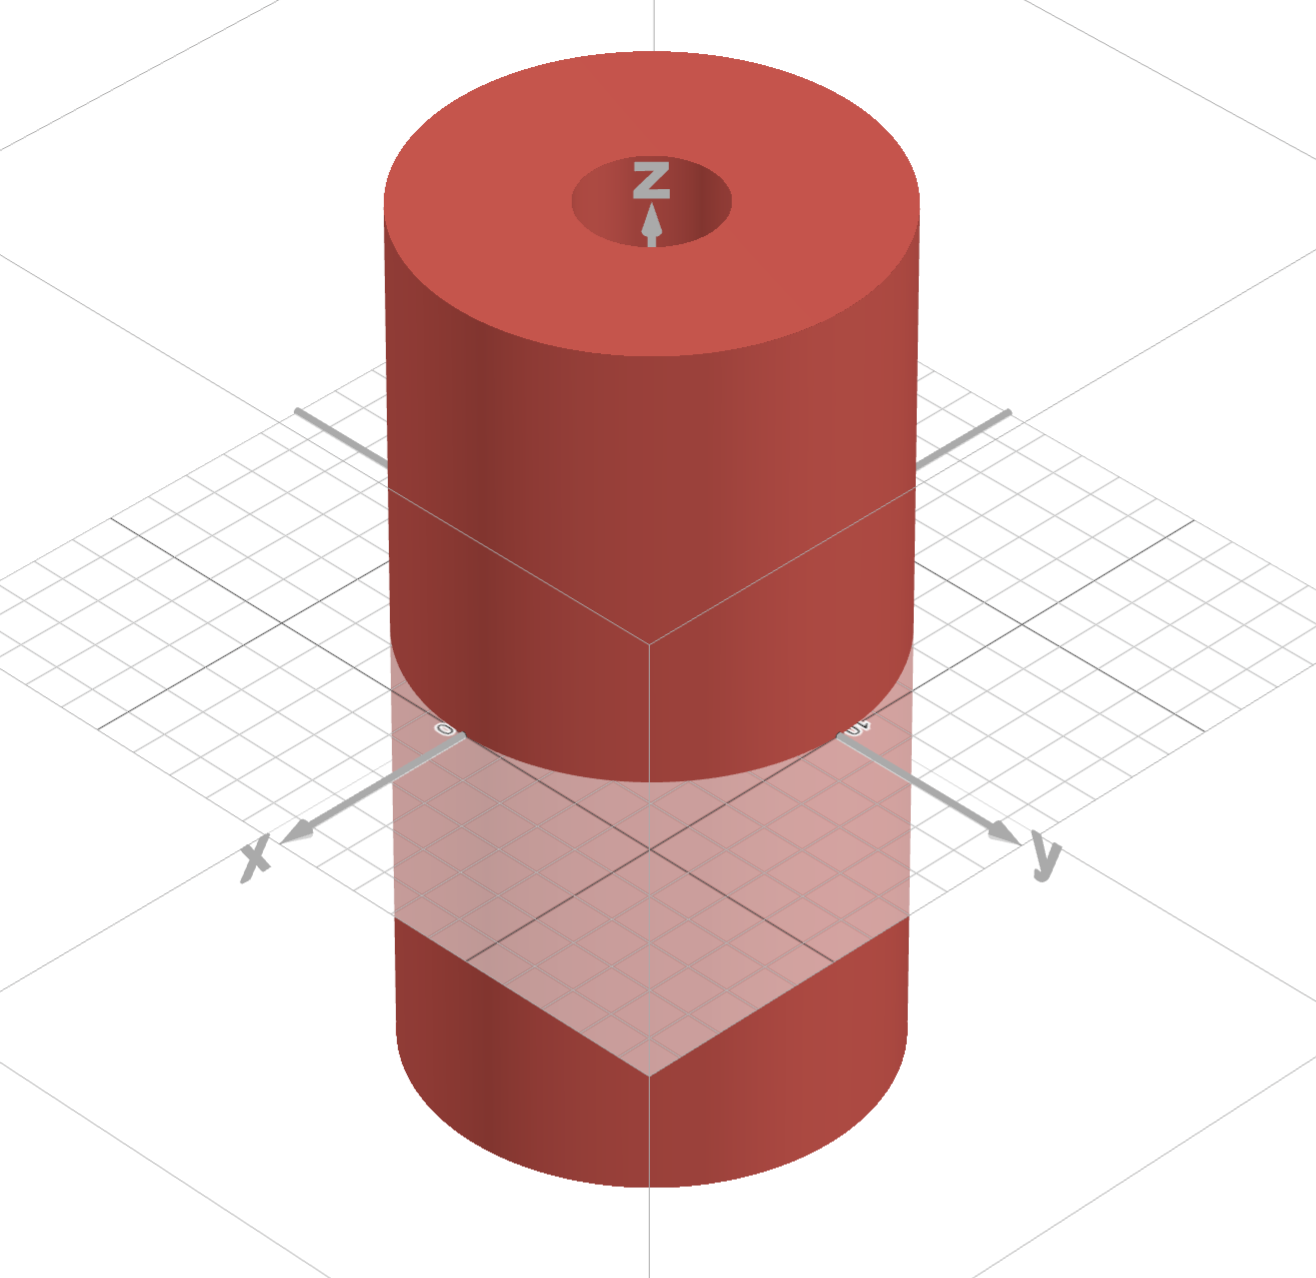 | 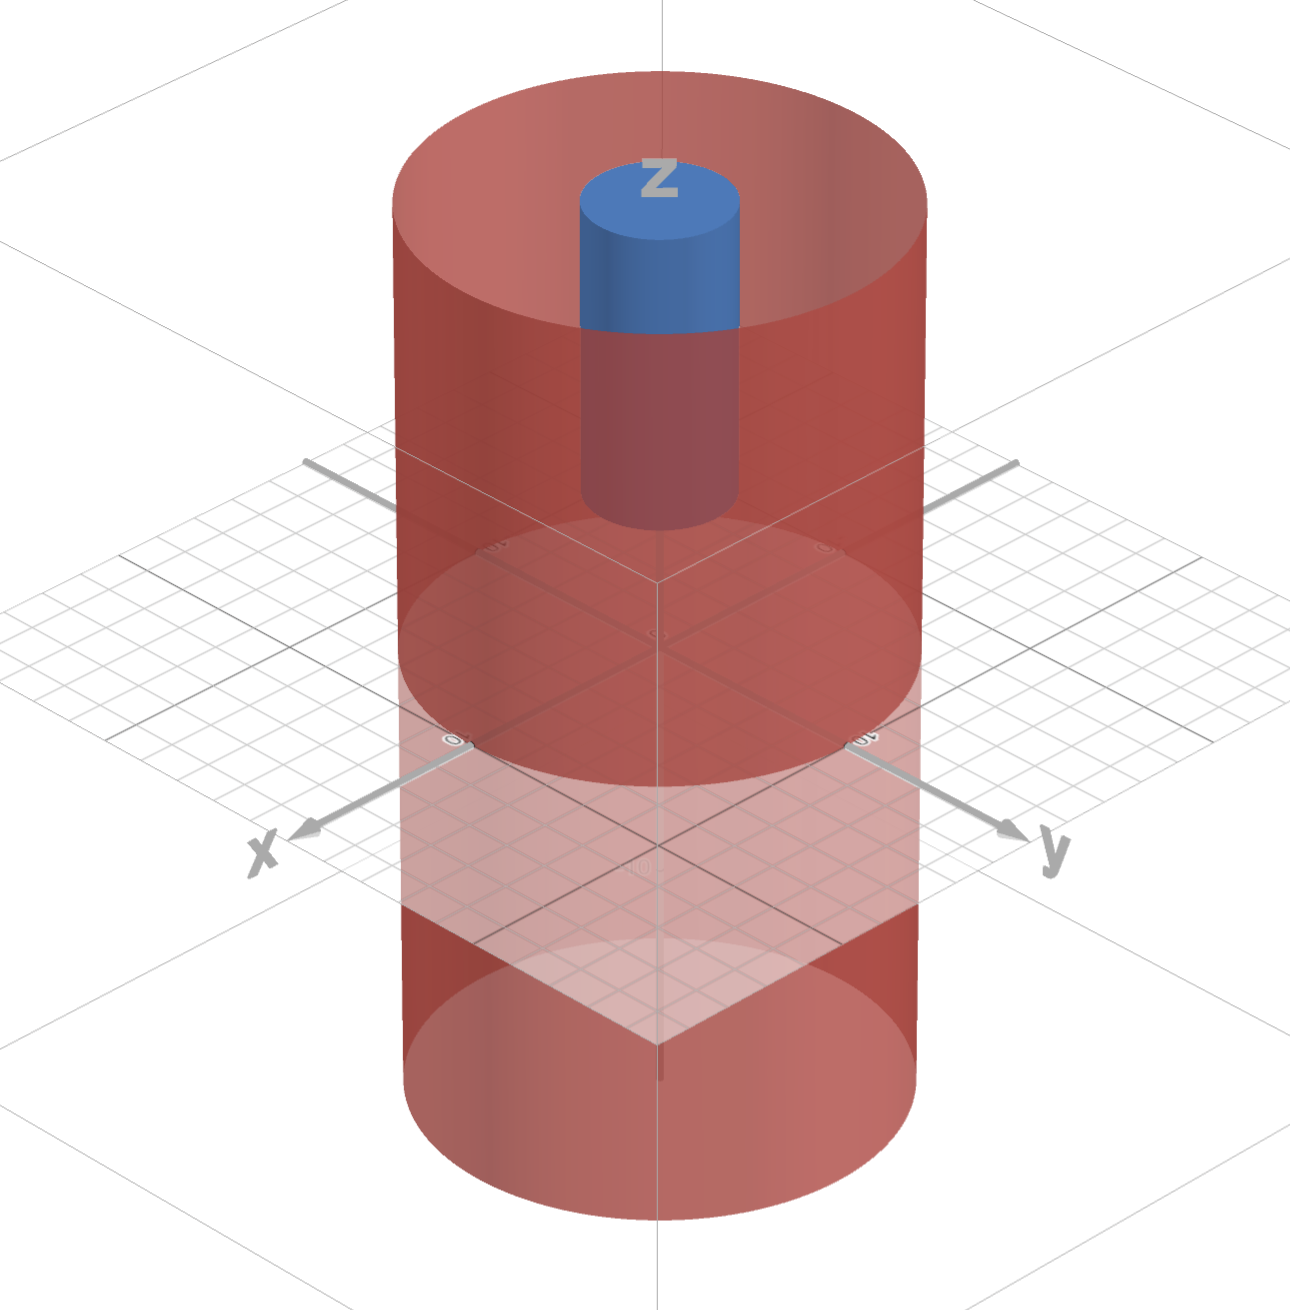 | 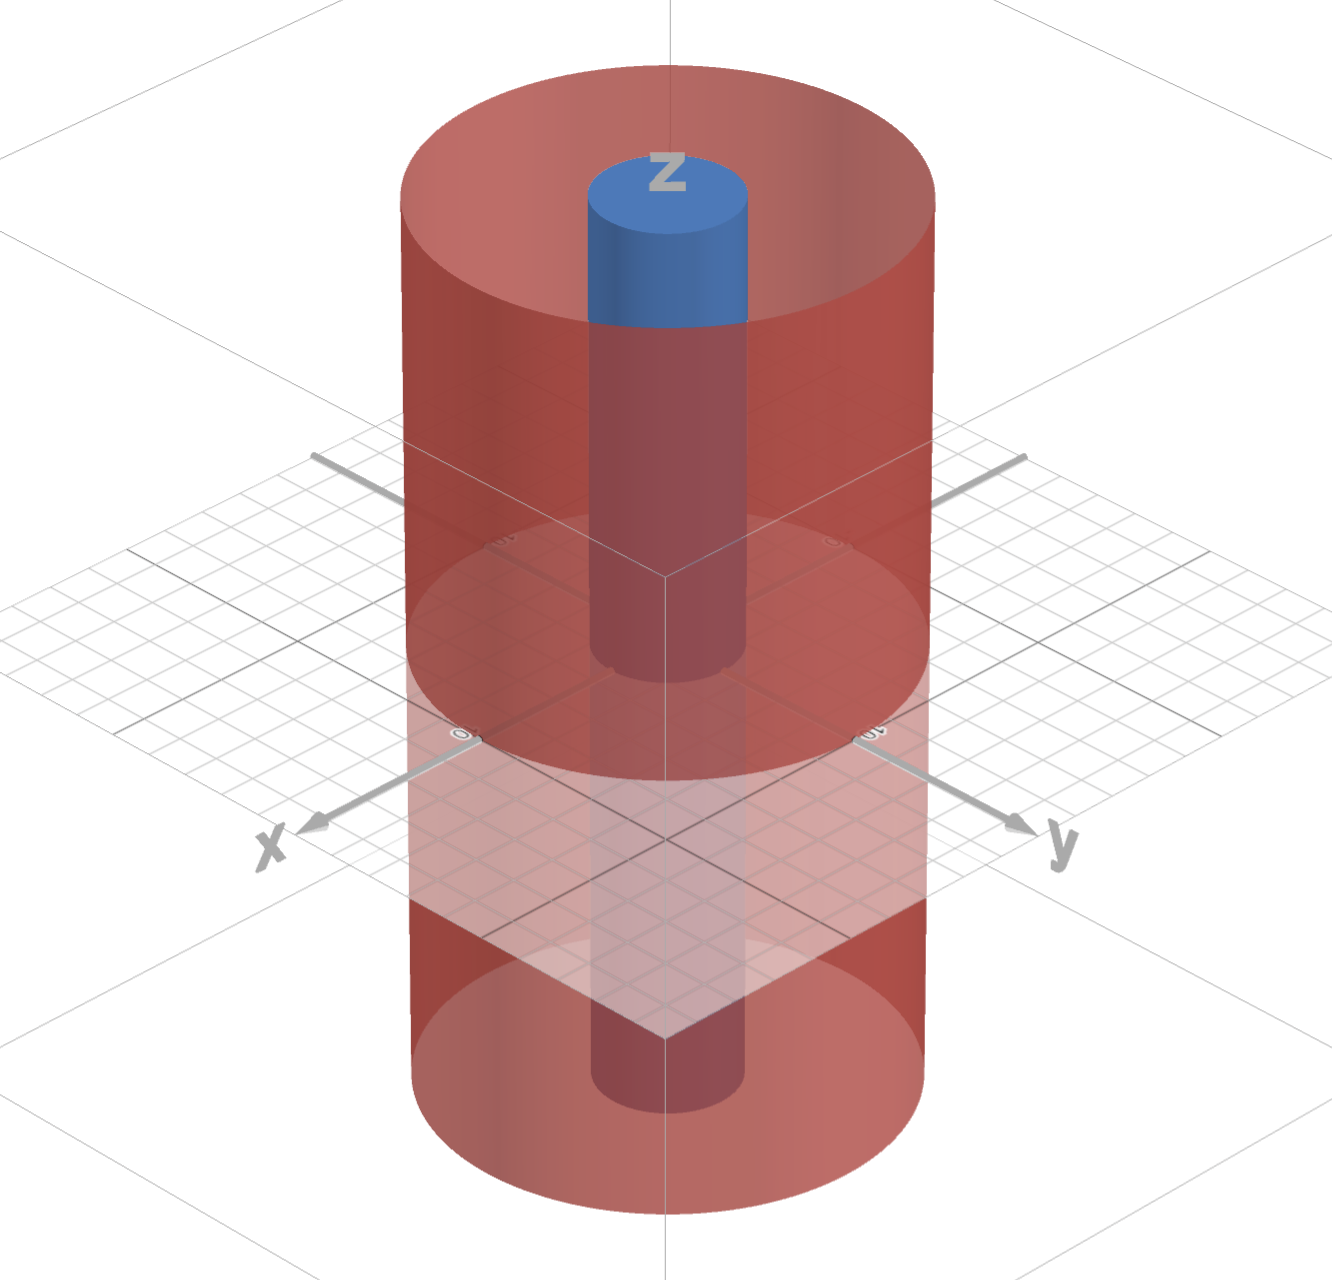 |

**Fig 1.1 The fuel rod (red), can be seen to stretch from z=20 to z=-20, and have a radius of 4. Note that a core with radius 2 has been taken out, to provide room for the control rod to be inserted. Fig 1.2 the partially inserted fuel (blue) can now be seen. The fuel rod has been made transparent to make the diagram clearer. Fig 1.3 the fully inserted control rod can be seen in the fuel rod.**

## **Building the Simulation**
---

I will start by defining some parameters. 

In [3]:
import numpy as np

# Parameters
R_INNER = 2.0 # cm # radius of the control rod
R_OUTER = 4.0 # cm # radius of the fuel rod
h = 20
mean_free_path = 2.65  # cm

Next, I get a random direction, by picking a point on a sphere, and then turn that point into a unit vector in $\mathbb{R}^3$.

In [4]:
def random_direction():
    theta = np.random.uniform(0, 2 * np.pi)     # random direction on the xy-plane
    phi = np.random.uniform(0, np.pi)           # random latitude
    return np.array(
        [np.sin(phi) * np.cos(theta), np.sin(phi) * np.sin(theta), np.cos(phi)]
    )

Grab a random distance traveled. The mean free path of a neutron in uranium-235 is very dependent on the energy of a neutron, and also dependent on the density of the uranium. I found a source that explained that the mean scattering distance was around 2.4 centimeters, with the mean fission distance being a fair bit larger - such that most neutrons undergo 5 scatterings before they are able to induce fission in a U-235 atom [2]. This is a simplified model, where each scattering event triggers a fission event which results in the release of an additional neutron. Thus a mean free path slightly higher than the mean scattering length was chosen. 

In [5]:
def random_distance():
    return np.random.exponential(mean_free_path)

Now, I want a function that tells me if the coordinates of some point lie in the fuel rod. 

In [6]:
def in_fuel_rod(x, y, z):
    r2 = x*x + y*y
    return R_INNER**2 <= r2 <= R_OUTER**2 and -20 <= z <= 20

Now, I want to determine if a path traced by a neutron would intersect the control rod, when it has been lowered such that its base is at some height $h$. 

Say we have a neutron at some initial position $p_0=(x_0,y_0,z_0)$, and then it travels a distance $d$, in some direction parallel to a unit vector $\hat{n}$. We can get all of those variables with the above code. The path traveled by the neutron can be parameterized by 
$$
\vec{p}(t) = p_0 + t\hat{d};\: t\in[0,d]
$$
We have a control rod of radius $R=3$ and we want to see in the $x$ and $y$ positions ever end up in the cylinder. Thus, we want to see if there exists $t$ such that
$$
(x(t))^2+(y(t))^2=2^2=4
$$
Solving for $t$, we get the following quadratic in $t$:
$$
(d_x^2+d_y^2)t^2+2(x_0d_x+y_0d_y)t+x_0^2+y_0^2-2^2=0
$$
We then solve for $t$, if such $t$ exist to verify whether the neutron intersects the control rod. If there are no such $t$, then the neutron misses the control rod. But that is not enough. We have to then verify if the $z$-component at each of those points is within the height of the control rod. Which is to say
$$
20\geq z(t)\geq h
$$

In [7]:
def path_intersects_control_rod(origin, direction, 
                                   R_min=2.0, R_max=4.0,
                                   z_min=h, z_max=20.0):
    
    x0, y0, z0 = origin  # original position
    dx, dy, dz = direction # direction (from random_direction)

    # check if the ray has horizontal components.
    A = dx*dx + dy*dy
    if A == 0:
        return False  # ray is exactly parallel to cylinder axis

    # Helper to test intersection with radius R
    def intersect_radius(R):
        C = x0*x0 + y0*y0 - R*R  # components of the polynomial in t (above)
        B = 2*(x0*dx + y0*dy)
        disc = B*B - 4*A*C     # calculates the discriminant of the polynomial, makes sure there are real solutions to the quadratic. 
        if disc < 0:
            return None
        sqrt_disc = np.sqrt(disc)

        t1 = (-B - sqrt_disc) / (2*A)
        t2 = (-B + sqrt_disc) / (2*A)

        # only keep positive solutions
        ts = [t for t in (t1, t2) if t >= 0]
        if not ts:
            return None

        return min(ts)

    # Find nearest intersection with either boundary
    t_outer = intersect_radius(R_max)
    t_inner = intersect_radius(R_min)

    # Neutron hits the control rod if it hits the outer boundary
    candidates = []
    if t_outer is not None: # does it exist?
        # compute z at intersection
        z = z0 + t_outer * dz
        if z_min <= z <= z_max:
            candidates.append(t_outer)

    if t_inner is not None: # does it exist?
        # compute z at intersection
        z = z0 + t_inner * dz
        if z_min <= z <= z_max:
            candidates.append(t_inner)

    return len(candidates) > 0  # return True if there are valid intersections

Now, we move the neutron in the direction random_direction, and a distance of random_distance. If the particle is in the fuel rod, return the final coordinates. If not, return None. 

In [8]:
def move_neutron(position, absorb_prob, h):
    d = random_distance()
    direction = random_direction()
    final_pos = position + d * direction

    # Check if neutron intersects the control rod cylinder
    hit = path_intersects_control_rod(position, direction, z_min=h)

    if hit:
        # Absorption chance
        if np.random.random() < absorb_prob:
            return None  # neutron absorbed
        # Otherwise, neutron continues, but check if final position is inside inner radius
        x, y, z = final_pos
        r2 = x**2 + y**2
        if r2 < R_INNER**2 and -20 <= z <= 20:
            return None  # neutron would land inside the fuel rod gap
            
        else:
            return final_pos

    else:
        # No intersection: also check if final position is inside inner radius
        x, y, z = final_pos
        r2 = x**2 + y**2
        if r2 < 4 and -20 <= z <= 20:
            return None  # neutron would land inside the fuel rod gap
        if r2 > 4**2:
            return None  # neutron would land outside the fuel rod
        else:
            return final_pos

Now it is time to implement a single run. Start by picking a random position.

In [9]:
def sample_initial_position():
    # radius^2 is uniformly distributed between inner^2 and outer^2 for the fuel rod, to account for the volume increasing as a function of radius. 
    r2 = np.random.uniform(R_INNER**2, R_OUTER**2)   
    r = np.sqrt(r2)

    theta = np.random.uniform(0, 2*np.pi) # random angle to give the x and y positions

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # uniform in height
    z = np.random.uniform(-20, 20) # random z

    return np.array([x, y, z])

Simulate a single run with (initial_neutrons) begin the number of neutrons per simulation.

In [10]:
def simulate_one_run(absorb_prob):
    # Generate initial neutrons in the fuel
    current_gen = [sample_initial_position() for _ in range(initial_neutrons)]
    counts = [len(current_gen)]

    for g in range(1, generations):
        next_gen = []

        for pos in current_gen:
            final = move_neutron(pos, absorb_prob, h=-20)   # uses the ray-cylinder intersection

            if final is not None:
                # neutron produces two offspring at its final location
                next_gen.append(final.copy())
                next_gen.append(final.copy())

        counts.append(len(next_gen))
        current_gen = next_gen

    # Compute generation-wise k-values
    k_values = [
        counts[i+1] / counts[i] if counts[i] > 0 else 0
        for i in range(len(counts)-1)
    ]

    return k_values

## **Testing a Single Simulation**
---
I want to test a single simulation, to verify that the behaviour is as expected.

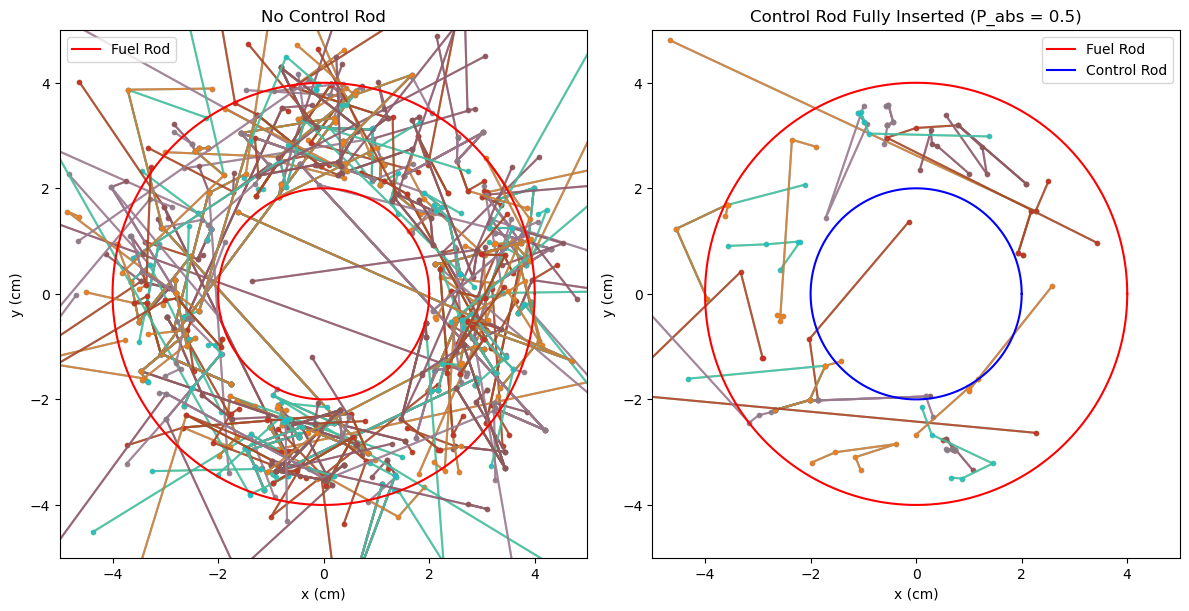

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_neutrons = 100
generations = 5

R_in = 2
R_out = 4
theta = np.linspace(0, 2*np.pi, 600)

# Helper to generate a neutron path across generations (for visualization - uses the same move_neutron)
def generate_paths(absorb_prob=0.5, h=-20):
    # Initial positions
    current_gen = [sample_initial_position() for _ in range(n_neutrons)]
    paths = [[pos.copy()] for pos in current_gen]  # initialize paths

    for g in range(1, generations):
        next_gen = []
        next_paths = []

        for i, pos in enumerate(current_gen):
            # Move neutron using move_neutron (handles absorption and fuel rod)
            newpos = move_neutron(pos, absorb_prob, h)
            
            if newpos is None:
                continue        # neutron absorbed or invalid step then no path update
                        
            # Only append if valid:
            next_gen.append(newpos.copy())
            next_gen.append(newpos.copy())
                        
            # record path only for valid positions
            next_paths.append(paths[i] + [newpos.copy()])
            next_paths.append(paths[i] + [newpos.copy()])

        current_gen = next_gen
        paths = next_paths

        if len(current_gen) == 0:
            break  # stop early if all neutrons are absorbed or out of the fuel

    return paths

# Generate paths for both cases
paths_no_rod = generate_paths(absorb_prob=0.0)
paths_with_rod = generate_paths(absorb_prob=0.5)


# create a multi-figure subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# No Control Rod
ax = axes[0]
for path in paths_no_rod:
    path = np.array(path)
    ax.plot(path[:,0], path[:,1], marker='o', markersize=3, alpha=0.7)
ax.plot(R_out*np.cos(theta), R_out*np.sin(theta), "r", label="Fuel Rod")
ax.plot(R_in*np.cos(theta), R_in*np.sin(theta), "r")
ax.set_aspect("equal", "box")
ax.set_title("No Control Rod")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.legend()

# Control Rod Fully Inserted
ax = axes[1]
for path in paths_with_rod:
    path = np.array(path)
    ax.plot(path[:,0], path[:,1], marker='o', markersize=3, alpha=0.7)
ax.plot(R_out*np.cos(theta), R_out*np.sin(theta), "r", label="Fuel Rod")
ax.plot(R_in*np.cos(theta), R_in*np.sin(theta), "b", label="Control Rod")
ax.set_aspect("equal", "box")
ax.set_title("Control Rod Fully Inserted (P_abs = 0.5)")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.legend()

plt.tight_layout()
plt.show()

**Fig 2. Test simulations with and without a control rod inserted, 100 neutrons and 5 generations each. A 2-d projection of the 3 dimensional trajectories. (Left) without the control rod; (Right) with a control rod ($P_{abs}=0.5$) fully inserted. Notice how (qualitatively) there are fewer neutrons after five generations when the control rod is inserted.**

## **How is k per generation affected by the insertion of the control rods?**
---
I want to sweep over six control-rod insertion percentages, from 0\% to 100\%, to determine how the $k$ at each generation number is affected by control rod insertion. Note that I am considering $k$ for each generation to be defined by the following equation, _where N is the number of neutrons in a generation, and the subscript denotes the generation number_:
$$k_g=\frac{N_{g}}{N_{g-1}}$$
I am choosing to use 80 neutrons, as that was the smallest I could reasonably go where it became unlikely that most of the neutrons would immediately exit the fuel rod. I chose a k-value that both minimized compute time while reducing the probability of outliers. 

A generation count of 25 generations was used to analyze the long-term effects of the control rod.

A replication count of 30 was used to minimize the computational load. 

In [ ]:
from tqdm import tqdm
import pickle  # allows me to save the data in a dictionary so I can create and modify the data without having to fully re-run the simulation. 
from joblib import Parallel, delayed

# load in my materials
materials = {
    "Boron-10": P_B10,
    "Silver-109": P_Ag109,
    "Hafnium-177": P_Hf177,
    "Iron-56": P_Fe56
}

# Parameters
initial_neutrons = 80  # A lower initial neutron count to keep the computational cost down. 
generations = 25     # to see the long-term effects on k
replications = 30    # A lower replication number to keep the computational cost down. 
insertions = [0, 20, 40, 60, 80, 100] # different percentages

# Storage for results (lists)
# Structure: k_data[material_name][insertion] = list of k-values
k_data = {mat: {} for mat in materials}

# Simulation Loop
for material_name, P_abs in materials.items():
    print(f"Running simulations for {material_name} (P_abs={P_abs:.3f})")

    for insertion in tqdm(insertions, desc=f"{material_name} progress"):
        absorb_prob = P_abs * insertion / 100

        # Parallelize over replications
        results = Parallel(n_jobs=-1)(
            delayed(simulate_one_run)(absorb_prob) for _ in range(replications)
        )
        
        results = np.array(results)  # shape: (replications, generations-1)
        
        # Mean and SEM per generation
        k_mean = np.mean(results, axis=0)
        k_sem  = np.std(results, axis=0, ddof=1) / np.sqrt(replications)
        
        # Store both
        k_data[material_name][insertion] = {
            "mean": k_mean.tolist(),
            "sem":  k_sem.tolist()
        }

# Save results to computer
with open("k_data_lists.pkl", "wb") as f:
    pickle.dump(k_data, f)

Running simulations for Boron-10 (P_abs=0.999)


Hafnium-177 progress: 100%|██████████| 6/6 [28:26<00:00, 284.38s/it]   


Running simulations for Iron-56 (P_abs=0.173)


Iron-56 progress:  17%|█▋        | 1/6 [22:48<1:54:01, 1368.38s/it]

I will also be computing the Standard Error of the Mean, for each insertion% + material type pair. This is defined to be
$$
SEM = \frac{\text{Standard deviation in }k}{\text{Number of replications}}
$$
This will tell me how certain the measured $k$-values are.

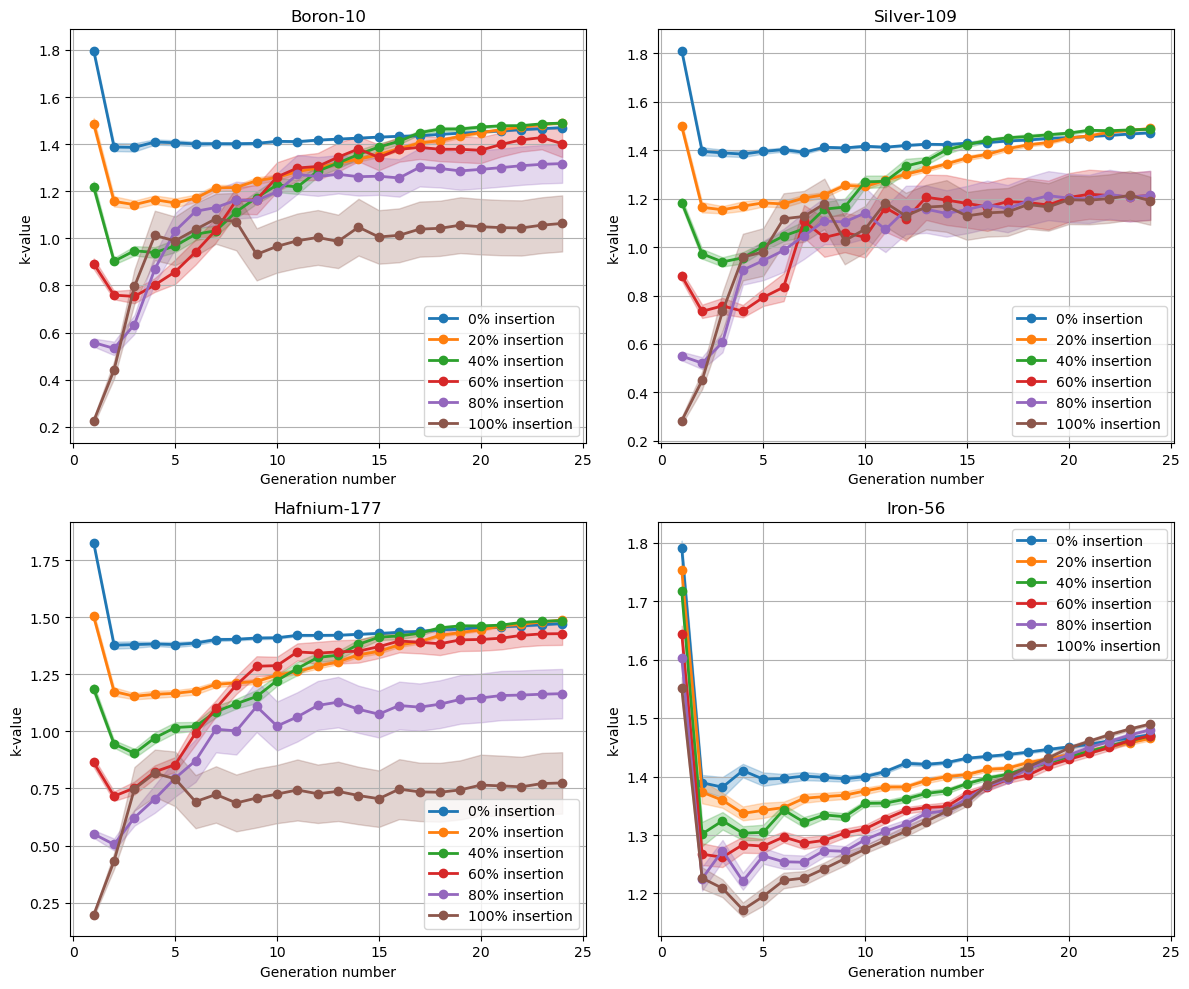

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

with open("k_data_lists.pkl", "rb") as f:
    k_data = pickle.load(f)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (material_name, data) in enumerate(k_data.items()):
    ax = axes[i]

    for insertion, stats in data.items():
        mean = np.array(stats["mean"])
        sem  = np.array(stats["sem"])
        generations = np.arange(1, len(mean) + 1)

        line, = ax.plot(
            generations,
            mean,
            marker="o",
            linewidth=2,
            label=f"{insertion}% insertion"
        )

        ax.fill_between(
            generations,
            mean - sem,
            mean + sem,
            color=line.get_color(),
            alpha=0.25
        )

    ax.set_title(material_name)
    ax.set_xlabel("Generation number")
    ax.set_ylabel("k-value")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

**Fig 3. The multiplication factor as a function of generation number for four different candidate control rod materials. _Top-right_ is Silver-109 - absorption probability: 97.326%; _bottom-right_ is Iron-56 - absorption probability: 17.255%; _bottom-left_ is Hafnium-177 - absorption probability: 99.946%
; _top-left_ is Boron 10 - absorption probability: 99.919%.**

**There are a few things to note here. First, only the control rods with absorption probabilities above 99% are able to achieve a long-term critical reaction. In a B-10, at 100% insertion, it is able to maintain a critical reaction. In Hf-177, 100% insertion results in a sub-critical reaction; while 80% percent insertion could result in a barely supercritical reaction. Likely an insertion % of around 85% could maintain a critical reaction when using a Hafnium-177 control rod. For Ag-109, no insertion percentages result in a critical reaction. Even at 100% insertion, the silver control rod results in a long-term k value of 1.2. For Iron-56, at no point - for any set of variables, does k drop to 1.**

**Second, over many generations, the blue line on each plot - which can act as a stand-in for "no control rod" - slowly grows to a k-value of 1.5. The steady growth in k suggests that, without an effective control rod at a reasonable insertion percentage, the chain reaction will continue to grow without bound.**

**Finally, note that for high insertion % trials, the standard error of the mean is much larger than for lower insertion percentages. Because the replication count is constant, this suggests that at high insertion percentages, the standard deviation is much larger. This is likely because the added factor of neutrons being absorbed by the control rod results in a large spread of neutron counts from each generation to the next. This conclusion is aided by the lack of this behaviour in the low-insertion-percentage trial.**

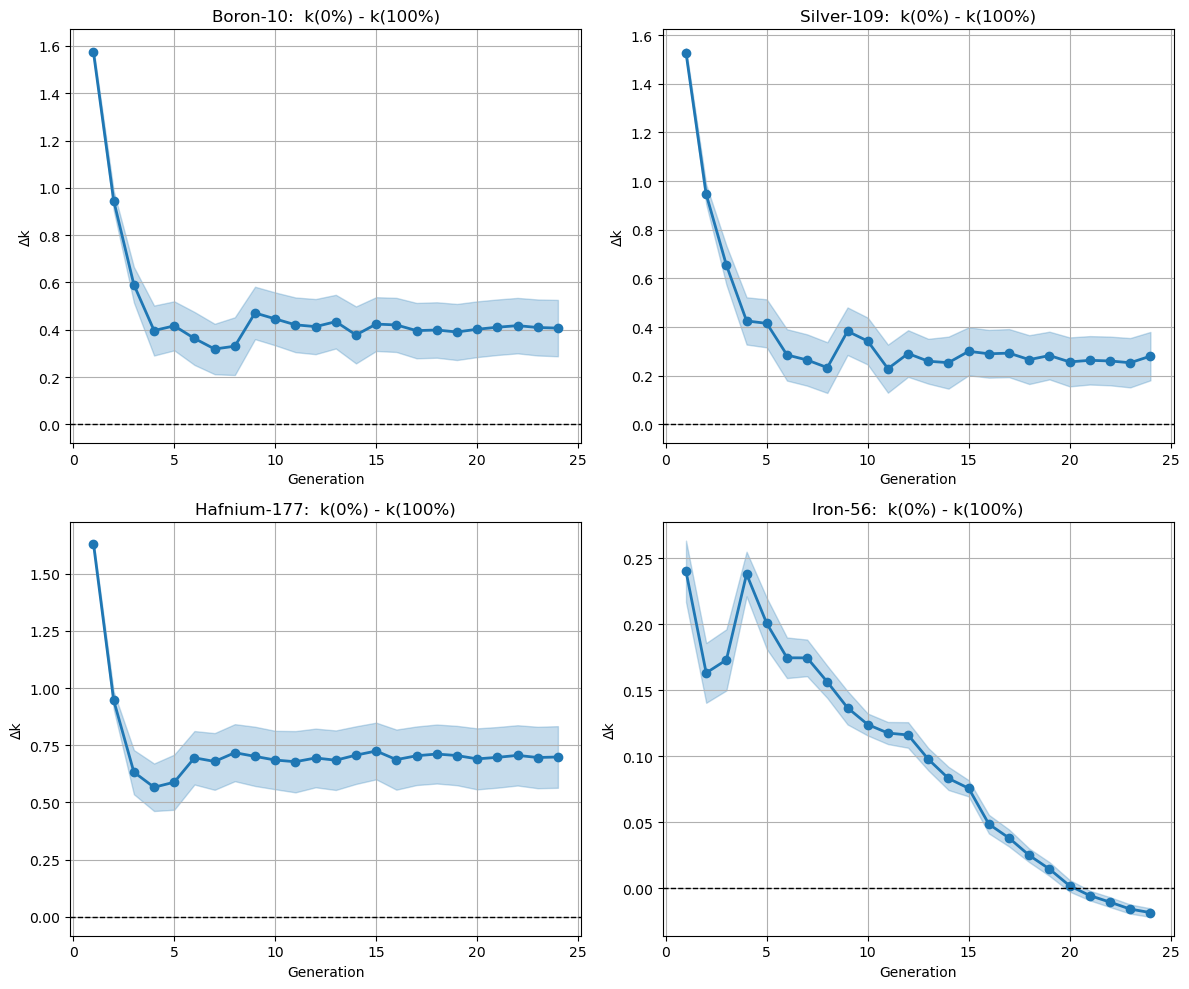

In [12]:
with open("k_data_lists.pkl", "rb") as f:
    k_data = pickle.load(f)

materials_order = [
    "Boron-10",
    "Silver-109",
    "Hafnium-177",
    "Iron-56"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, material in enumerate(materials_order):
    ax = axes[idx]

    k0_mean   = np.array(k_data[material][0]["mean"])
    k0_sem    = np.array(k_data[material][0]["sem"])
    
    k100_mean = np.array(k_data[material][100]["mean"])
    k100_sem  = np.array(k_data[material][100]["sem"])

    # Mean difference
    k_diff = k0_mean - k100_mean

    # SEM propagation
    k_diff_sem = np.sqrt(k0_sem**2 + k100_sem**2)

    generations = np.arange(1, len(k_diff) + 1)

    # Mean line
    line, = ax.plot(
        generations,
        k_diff,
        marker="o",
        linewidth=2
    )

    # Uncertainty band
    ax.fill_between(
        generations,
        k_diff - k_diff_sem,
        k_diff + k_diff_sem,
        color=line.get_color(),
        alpha=0.25
    )

    ax.axhline(0, color="k", linestyle="--", linewidth=1)

    ax.set_title(f"{material}:  k(0%) - k(100%)")
    ax.set_xlabel("Generation")
    ax.set_ylabel("Δk")
    ax.grid(True)

plt.tight_layout()
plt.show()

**Fig. Four plots demonstrating the diminishing effect of the control rods over time, for four different candidate control rod materials. Top-right_ is Silver-109 - absorption probability: 97.326%; _bottom-right_ is Iron-56 - absorption probability: 17.255%; _bottom-left_ is Hafnium-177 - absorption probability: 99.946%
; _top-left_ is Boron 10 - absorption probability: 99.919%.**

**There is some interesting behaviour to note with all four materials. For B-10, the difference becomes steady at around $\Delta k=0.4$. For Hafnium, the difference becomes steady at around $\Delta k=0.7$. For Silver, the difference becomes steady at around $\Delta k=0.3$. Finally, there is no steady point for $\Delta k$ in the iron trial. This suggests a couple things. For one, value at which $\Delta k$ stabilizes appears to be proportional to the absorption probability for the material. Secondly, for low enough absorption probabilities, $\Delta k$ does not stabilize. This suggests that a variable such as "Longterm $\Delta k$" could be used to quantifity the long-term effectiveness of a control rod. Additional tests with different materials would be required to determine the form of proportionality between "Longterm $\Delta k$" and absorption probability.**

## **Summary and Conclusion**
---

### _My Set-Up_

I found data describing have the total bound scattering cross section ($\sigma_{s}$) and the absorption cross section ($\sigma_a$) for four potential neutron absorbers.
Note that the sum of these two parameters gives us an estimate of the total number of interation with the metal. I assumed that the scattered neutrons pass through the control rod and re-enter the fuel rod. From this data, we could then define the probability that any neutron gets absorbed. 
$$
P_{abs}=\frac{\sigma_a}{\sigma_a+\sigma_s}\times 100\%
$$
Next, I found the probability that a neutron is absorbed by a control rod made of each isotope. My four candidate isotopes were:
- Boron-10. This a rare (20% abundance) isotope of boron with a very high absorption rate. 
- Silver-109. This a fairly common (48.17% abundance) isotope of silver with a decently high absorption rate. 
- Hafnium-177. This is a rare (18.6% abundance) isotope of hafnium with a very high absorption rate. 
- Iron-56. This is a common (91.7% abundance) isotope of iron with a high scattering rate.

The Fuel Rod was a cylinder of radius 4 centimeters and height 40 centimeters, centered at the origin. It contained a cylindrical cut-out to leave room for the control rod to be inserted. The control rod was a cylinder of radius 2 centimeters. A diagram can be seen in figure 1. 

### _My Investigation_

I then swept over six control-rod insertion percentages, from 0\% to 100\%, to determine how the $k$ at each generation number is affected by control rod insertion. I considered $k$ for each generation to be defined by the following equation, _where N is the number of neutrons in a generation, and the subscript denotes the generation number_:
$$k_g=\frac{N_{g}}{N_{g-1}}$$
The results of this sweep can be seen in figure 3.

Finally, I reinforced my conclusions by plotting the difference between 0\% and 100\% insertion at each generation. 

### _Conclusions_

1) Boron-10 is an effective control rod candidate. Evidence:
   - Fig.3: With a B-10 control rod, at 100% insertion, a critical reaction is maintained.
   - Fig.4: For B-10, the difference becomes steady at around $\Delta k=0.4$.
2) Hafnium-177 is an effective control rod candidate. Evidence:
   - Fig.3: In Hf-177, 100% insertion results in a sub-critical reaction; while 80% percent insertion could result in a barely supercritical reaction.
   - Fig.4: For Hafnium, the difference becomes steady at around $\Delta k=0.7$

### _Future Extensions_

I noticed that there seems to be a relationship between the absorptivity of a material and its long-term $\Delta k$ (_as defined in the caption for Fig.4_). I would love to investigate the nature of that proportionality. 

## **Acknowledgements**
---

I used generative AI to help me turn the simulation running into a plot where I could visually see the trajectories. My initial set of functions only returned the $k$-values, not the paths that each neutron took, because that was not useful for my data analysis. I also used generative AI to adjust my sweep so that the replications ran in parallel, there was a progress bar, and the data was saved to a dictionary, where I could then save the lists of k values. Finally, generative AI was used to workshop my approach to checking when neutron paths intersect the control rod.

I also referenced a report from James Grayson, 2011, when picking isotopes to examine. A link can be found at http://large.stanford.edu/courses/2011/ph241/grayson1/. I verified all values with the NIST link in my references. 

## References

[1] https://www.ncnr.nist.gov/resources/n-lengths/ 

[2] https://nuclearweaponarchive.org/Nwfaq/Nfaq2.html

## Appendix 1: Code validation

### A1.1: Single neutron offspring generation.

I want to make sure that when a single neutron is plotted, it follows a path where it can be seen generating offspring. I see that!

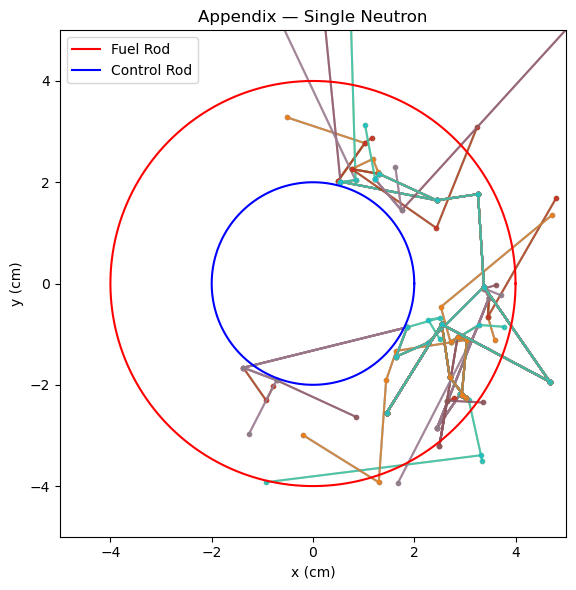

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_neutrons = 1
generations = 10

R_in = 2
R_out = 4
theta = np.linspace(0, 2*np.pi, 600)

# Generate neutron paths 
paths_no_rod = generate_paths(absorb_prob=0.0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot each neutron path
for path in paths_no_rod:
    path = np.array(path)
    ax.plot(path[:,0], path[:,1], marker='o', markersize=3, alpha=0.7)

# Plot the fuel rod outer boundary
theta = np.linspace(0, 2*np.pi, 600)
ax.plot(R_out*np.cos(theta), R_out*np.sin(theta), "r", label="Fuel Rod")
ax.plot(R_in*np.cos(theta), R_in*np.sin(theta), "b", label="Control Rod")

# Formatting
ax.set_aspect("equal", "box")
ax.set_title("Appendix — Single Neutron")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend()

plt.tight_layout()
plt.show()

### A1.2: Multi-neutron reasonability. 

I want to see that, with a few neutrons, no neutrons follow paths where they leave the fuel rod and still produce offspring. I do not see that!

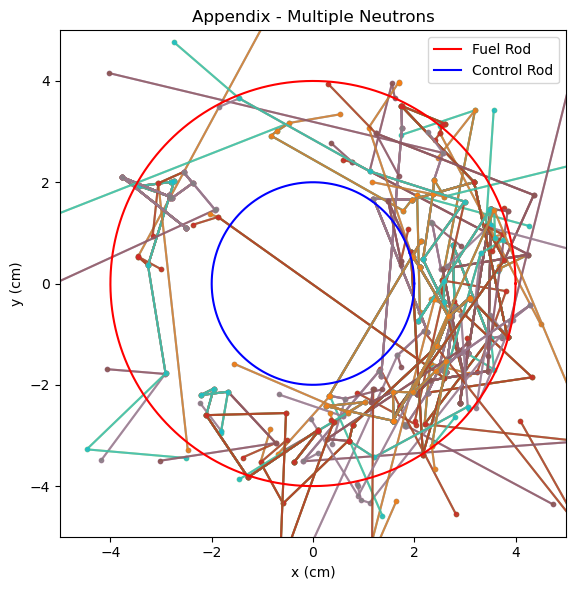

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_neutrons = 10
generations = 10

R_in = 2
R_out = 4
theta = np.linspace(0, 2*np.pi, 600)

# Generate neutron paths 
paths_no_rod = generate_paths(absorb_prob=0.0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot each neutron path
for path in paths_no_rod:
    path = np.array(path)
    ax.plot(path[:,0], path[:,1], marker='o', markersize=3, alpha=0.7)

# Plot the fuel rod outer boundary
theta = np.linspace(0, 2*np.pi, 600)
ax.plot(R_out*np.cos(theta), R_out*np.sin(theta), "r", label="Fuel Rod")
ax.plot(R_in*np.cos(theta), R_in*np.sin(theta), "b", label="Control Rod")

# Formatting
ax.set_aspect("equal", "box")
ax.set_title("Appendix - Multiple Neutrons")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend()

plt.tight_layout()
plt.show()

### A1.3: Control Rod with 100% absorption.

I want to see that, with an absorption of 100\%, no neutrons can cross the center. I see that! Note that paths do still trace through the gap, they just do not generate offspring. 

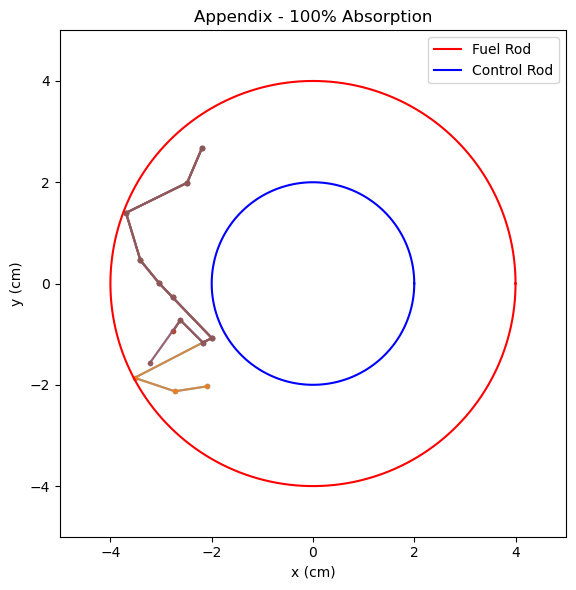

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_neutrons = 25
generations = 10

R_in = 2
R_out = 4
theta = np.linspace(0, 2*np.pi, 600)

# Generate neutron paths 
paths_rod = generate_paths(absorb_prob=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot each neutron path
for path in paths_rod:
    path = np.array(path)
    ax.plot(path[:,0], path[:,1], marker='o', markersize=3, alpha=0.7)

# Plot the fuel rod outer boundary
theta = np.linspace(0, 2*np.pi, 600)
ax.plot(R_out*np.cos(theta), R_out*np.sin(theta), "r", label="Fuel Rod")
ax.plot(R_in*np.cos(theta), R_in*np.sin(theta), "b", label="Control Rod")

# Formatting
ax.set_aspect("equal", "box")
ax.set_title("Appendix - 100% Absorption")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend()

plt.tight_layout()
plt.show()